In [1]:
# Packages
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 25)

# # mlflow
# import mlflow
# from mlflow.models import infer_signature
# import mlflow.sklearn

# mlflow.set_tracking_uri("http://localhost:5000")
#import logging

#logging.basicConfig(level=logging.WARN)
#logger = logging.getLogger(__name__)


In [2]:
# export processed data set to csv

# export features for tree-based models
X_train_comb = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_processed.csv')
X_test_comb =pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_processed.csv')


# export target
y_train_comb = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test_comb = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')


In [3]:
gbc = GradientBoostingClassifier(n_estimators=200,subsample=1, max_leaf_nodes=31, max_features='log2', max_depth=5, loss = 'log_loss', learning_rate=0.025, random_state=42)

In [4]:
gbc.fit(X_train_comb,y_train_comb)

/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.025, max_depth=5,
                           max_features='log2', max_leaf_nodes=31,
                           n_estimators=200, random_state=42, subsample=1)

# Performance on test

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4098
_____________________
Weighted Quadratic Kappa: 0.3547


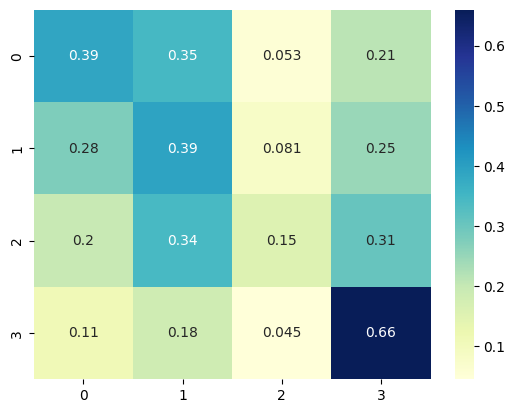

In [5]:
y_pred = gbc.predict(X_test_comb)
our_metrics(y_test_comb,y_pred)

# Performance on train

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4839
_____________________
Weighted Quadratic Kappa: 0.4034


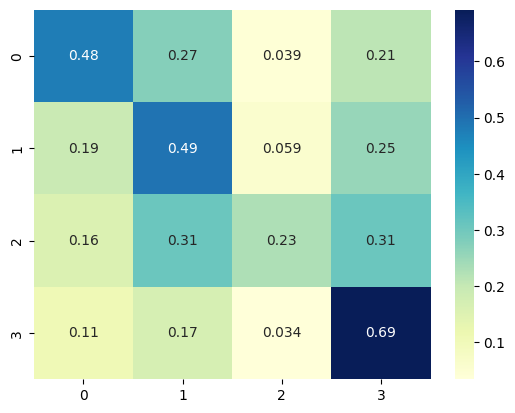

In [6]:
y_pred_tr = gbc.predict(X_train_comb)
our_metrics(y_train_comb,y_pred_tr)

# Feature importance

In [9]:
X_train_comb.columns
#gbc.feature_importances_

pd.DataFrame(gbc.feature_importances_,index=X_train_comb.columns,columns=["feature_importance"]).head(22)

,feature_importance
type,0.049147
gender,0.025749
sterilized,0.080004
breed_type,0.058305
vaccinated_dewormed,0.044452
fee_bin,0.017456
maturitysize_0,0.026198
maturitysize_1,0.025918
maturitysize_2,0.011453
maturitysize_3,0.005277
